In [6]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score,precision_score,recall_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df=pd.read_csv(r'C:\Users\HP\Downloads\archive (2)\creditcard.csv')

In [8]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [73]:
df.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350151,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254117,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.081839,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313249,0
284806,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,0.514355,0


In [74]:
print(df.isnull().sum())

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [11]:
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))

In [75]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [12]:
df.drop(['Time'], axis=1, inplace=True)

In [76]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [78]:
df.duplicated().any()

True

In [79]:
data=df.drop_duplicates()

In [80]:
data.shape

(275663, 30)

In [81]:
data["Class"].value_counts()

0    275190
1       473
Name: Class, dtype: int64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


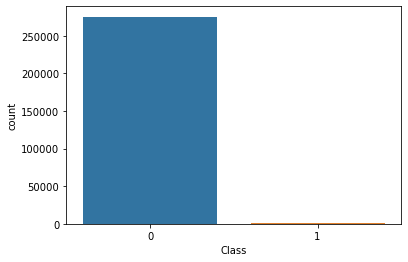

In [82]:
sns.countplot(data['Class'])
plt.show()

In [84]:
X=data.drop(['Class'], axis=1)
y=data['Class']

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [86]:
classifier={
    "Logistic Regression": LogisticRegression(),
    "Decision Tree Classifier": DecisionTreeClassifier()
}


for name, clf in classifier.items():
    print(f"\n======{name}============")
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    print(f"\n Accuracy:{accuracy_score(y_test, y_pred)}")
    print(f"\n precision:{precision_score(y_test, y_pred)}")
    print(f"\n recall:{recall_score(y_test, y_pred)}")
    print(f"\n F1 Score:{f1_score(y_test, y_pred)}")


======Logistic Regression============

 Accuracy:0.9991874165650937

 precision:0.8648648648648649

 recall:0.5818181818181818

 F1 Score:0.6956521739130435

======Decision Tree Classifier============

 Accuracy:0.9990423123802891

 precision:0.6746031746031746

 recall:0.7727272727272727

 F1 Score:0.7203389830508475


In [ ]:
#undersampling


In [87]:
normal=data[data['Class']==0]
fraud=data[data['Class']==1]

In [88]:
normal.shape


(275190, 30)

In [89]:

fraud.shape

(473, 30)

In [90]:
normal_sample=normal.sample(n=473)

In [91]:
normal_sample.shape

(473, 30)

In [92]:
new_data=pd.concat([normal_sample,fraud], ignore_index=True)

In [93]:
new_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-2.253348,1.912037,-1.632204,-2.128029,-1.571667,2.713312,-6.675163,-14.683832,-3.138299,-1.432725,...,-4.942163,1.480530,0.881674,-0.863405,0.322409,-0.223422,0.117031,0.422813,-0.185310,0
1,-9.781069,-10.012767,-5.468667,0.242003,-11.697156,8.794068,14.011559,-2.959224,-0.551058,-1.500027,...,-2.681012,-0.026779,0.874389,-1.160255,0.986516,-0.220563,2.297418,-0.507339,13.307392,0
2,0.023685,-1.809840,0.872756,2.286712,-1.262834,1.021568,-0.096778,0.253481,2.334340,-0.834392,...,-0.197018,-1.101152,-0.337279,0.173216,0.125557,-0.630714,-0.042634,0.102589,1.761478,0
3,-0.575364,1.080650,1.781040,0.417658,0.127947,-0.814490,0.705696,-0.115631,-0.832874,-0.673716,...,-0.214937,-0.681496,-0.132791,0.352338,0.055070,0.226651,0.031420,0.088258,-0.313289,0
4,-0.703965,1.106599,-0.555946,1.105342,0.109883,-0.651061,1.568436,0.114592,-0.811791,-0.344361,...,0.239216,0.603294,0.126882,-0.028839,0.095179,-0.375704,0.258640,0.191000,0.293581,0


In [99]:
new_data['Class'].value_counts()

0    473
1    473
Name: Class, dtype: int64

In [100]:
x=new_data.drop('Class',axis=1)
y=new_data['Class']

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [117]:
classifier={
    "Logistic Regression": LogisticRegression(),
    "Decision Tree Classifier": DecisionTreeClassifier()
}


for name, clf in classifier.items():
    print(f"\n======{name}============")
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    print(f"\n Accuracy:{accuracy_score(y_test, y_pred)}")
    print(f"\n precision:{precision_score(y_test, y_pred)}")
    print(f"\n recall:{recall_score(y_test, y_pred)}")
    print(f"\n F1 Score:{f1_score(y_test, y_pred)}")


======Logistic Regression============

 Accuracy:0.9991874165650937

 precision:0.8648648648648649

 recall:0.5818181818181818

 F1 Score:0.6956521739130435

======Decision Tree Classifier============

 Accuracy:0.9989697602878868

 precision:0.6511627906976745

 recall:0.7636363636363637

 F1 Score:0.7029288702928871


In [103]:
X=data.drop(['Class'], axis=1)
y=data['Class']

In [104]:
X.shape

(275663, 29)

In [105]:
y.shape

(275663,)

In [106]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=42)

In [108]:
classifier={
    "Logistic Regression": LogisticRegression(),
    "Decision Tree Classifier": DecisionTreeClassifier()
}


for name, clf in classifier.items():
    print(f"\n======{name}============")
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    print(f"\n Accuracy:{accuracy_score(y_test, y_pred)}")
    print(f"\n precision:{precision_score(y_test, y_pred)}")
    print(f"\n recall:{recall_score(y_test, y_pred)}")
    print(f"\n F1 Score:{f1_score(y_test, y_pred)}")


======Logistic Regression============

 Accuracy:0.9449761982630183

 precision:0.9734249075749841

 recall:0.9149050623709691

 F1 Score:0.943258212232723

======Decision Tree Classifier============

 Accuracy:0.9982194120425888

 precision:0.997401843384861

 recall:0.9990404466284784

 F1 Score:0.9982204725553288


In [109]:
dtc=DecisionTreeClassifier()
dtc.fit(X_res,y_res)

DecisionTreeClassifier()

In [110]:
import joblib

In [111]:
joblib.dump(dtc,'credit_card_model.pkl')

['credit_card_model.pkl']

In [112]:
model=joblib.load('credit_card_model.pkl')

In [113]:
pred=model.predict([[-1.3598071336738,-0.0727811733098497,2.53634673796914,1.37815522427443,-0.338320769942518,0.462387777762292,0.239598554061257,0.0986979012610507,0.363786969611213,0.0907941719789316,-0.551599533260813,-0.617800855762348,-0.991389847235408,-0.311169353699879,1.46817697209427,-0.470400525259478,0.207971241929242,0.0257905801985591,0.403992960255733,0.251412098239705,-0.018306777944153,0.277837575558899,-0.110473910188767,0.0669280749146731,0.128539358273528,-0.189114843888824,0.133558376740387,-0.0210530534538215,149.62]])

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [114]:
pred[0]

0

In [115]:
if pred[0] == 0:
    print("Normal Transcation")
else:
    print("Fraud Transcation")

Normal Transcation
